# EDA - Data Check and Cleaning

In [1305]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [1306]:
#Warning suppression. Only how it once
import warnings
warnings.filterwarnings('ignore')

In [1307]:
#PD Options
pd.set_option('display.max_columns', 40)

## 1. Initial Problem Statement

Create a cross-sectional look at how car efficiencies have improved over the years. Predict future miles per gallon for models, brands, or car types.

## 2. Inital End Goal

1. Predict the miles per gallon of a given brand and car type.
2. Predict Carbon impact given car brand and type

## 3. Data Preparation

### 3.1 Load data

In [1315]:
df = pd.read_csv('./Datasets/database.csv',low_memory=False)
df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),...,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,...,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


### 3.2 Check data features

In [1316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

### 3.3 Picking features that we want to use for our problems

Here is what the columns that is relevant to our problem and goal. All these features will not be fed into our model or will be used. This is something that still need to be analyzed. We will decide later after further anlysis using a chart

In [1317]:
features = [
    'Year', 'Make', 'Class', 'Drive', 'Transmission', 'Engine Index',
    'Engine Cylinders', 'Engine Displacement', 'Turbocharger', 'Supercharger', 'Fuel Type', 'Combined MPG (FT1)', 'Combined Electricity Consumption',
    'Combined Gasoline Consumption (CD)', 'Annual Fuel Cost (FT1)',
    'Annual Consumption in Barrels (FT1)', 'Tailpipe CO2 (FT1)',
    'Fuel Economy Score', 'GHG Score']
df_filtered = df[features]
df_filtered.head()


,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score
0,1984,Alfa Romeo,Minicompact Cars,NaN,Manual 5-Speed,9001,6.0,2.5,NaN,NaN,Regular,20,0.0,0.0,1750,16.480500,-1,-1,-1
1,1984,Alfa Romeo,Minicompact Cars,NaN,Manual 5-Speed,9005,6.0,2.5,NaN,NaN,Regular,20,0.0,0.0,1750,16.480500,-1,-1,-1
2,1984,Alfa Romeo,Two Seaters,NaN,Manual 5-Speed,9002,4.0,2.0,NaN,NaN,Regular,21,0.0,0.0,1650,15.695714,-1,-1,-1
3,1984,Alfa Romeo,Two Seaters,NaN,Manual 5-Speed,9006,4.0,2.0,NaN,NaN,Regular,21,0.0,0.0,1650,15.695714,-1,-1,-1
4,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,NaN,NaN,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1


In [1318]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 38113 non-null  int64  
 1   Make                                 38113 non-null  object 
 2   Class                                38113 non-null  object 
 3   Drive                                36924 non-null  object 
 4   Transmission                         38102 non-null  object 
 5   Engine Index                         38113 non-null  int64  
 6   Engine Cylinders                     37977 non-null  float64
 7   Engine Displacement                  37979 non-null  float64
 8   Turbocharger                         5239 non-null   object 
 9   Supercharger                         693 non-null    object 
 10  Fuel Type                            38113 non-null  object 
 11  Combined MPG (FT1)          

### 3.4 Check column with NA

Make a functions to count NA values so later on we can use it during the features engineering to tackle the NA Value

In [1319]:
def count_nan():
    df_na_counts = df_filtered.isna().sum().reset_index().rename(columns={'index':'column',0:'total_na'})
    df_na_counts = df_na_counts.loc[df_na_counts['total_na']>0]

    #Create NA to Data Ratio which basically indicates percentage of each features that will impacted the overall data counts 
    #if we consider it during NA removal. 
    df_na_counts['na_to_data_ratio'] = ( df_na_counts['total_na'] / len(df_filtered.axes[0])) * 100
    return df_na_counts

In [1320]:
count_nan()

,column,total_na,na_to_data_ratio
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586
8,Turbocharger,32874,86.254034
9,Supercharger,37420,98.181723


We will either replace the value in those features or drop the data depend on the situation.

#### 3.4.1 Turbocharger features

Let's see what unique values we have

In [1321]:
df_filtered['Turbocharger'].unique()

array([nan, 'T'], dtype=object)

From here we can assume that the Value with NA means that there are no any Turbo Charger installed in the cars. We need to replace those values with other value in order to exclude those data from removal during remove NA activity. We also change the entire TurboCharger values with boolean type since it's a matter Yes or No :)

In [1322]:
# Create Function to Modify the values to boolean. We will have the same case later with Supercharger
def features_to_boolean(features,true_val=[]):
    df_filtered[features] = df[features].replace(true_val, 1)
    df_filtered[features].fillna(0,inplace=True)

In [1323]:
features_to_boolean('Turbocharger',['T'])
df_filtered['Turbocharger'].unique()

array([0., 1.])

So the NA replaced with N, which means that the car do not have Turbocharger. now let's take a look on the NA to Data Ratio


In [1324]:
count_nan()

,column,total_na,na_to_data_ratio
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586
9,Supercharger,37420,98.181723


Check the data type. Make sure it's boolean

In [1325]:
df_filtered['Turbocharger'].dtype

dtype('float64')

#### 3.4.2 Supercharger features

Let's see what unique values we have

In [1326]:
df_filtered['Supercharger'].unique()

array([nan, 'S'], dtype=object)

It's the same as Turbocharger case. Then we just do as what we did with Turbocharger :)

In [1327]:
#Use Features to Boolean function which we created initially in the Turbocharger case
features_to_boolean('Supercharger',['S'])
df_filtered['Supercharger'].unique()

array([0., 1.])

Check again if the Supercharger has any NA or not

In [1328]:
count_nan()

,column,total_na,na_to_data_ratio
3,Drive,1189,3.119670
4,Transmission,11,0.028862
6,Engine Cylinders,136,0.356834
7,Engine Displacement,134,0.351586


Check if the datatype already converted to Boolean or not

In [1329]:
df_filtered['Supercharger'].dtype

dtype('float64')

#### 3.4.3 Drive Features

Let's check unique value from Drive. My guess, it should describe how many wheels or which wheels that are driven by the engine

In [1330]:
df_filtered['Drive'].unique()

array([nan, '2-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'Rear-Wheel Drive', 'Front-Wheel Drive', '4-Wheel Drive',
       'All-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

All car should have this information by right regardless it's powered by fossil fuel or other alternative enegry. It does not make sense if no any wheels driven by the engine.

In [1331]:
#Drive Features with NA
df_filtered[df_filtered['Drive'].isnull()][['Drive','Fuel Type']]

,Drive,Fuel Type
0,NaN,Regular
1,NaN,Regular
2,NaN,Regular
3,NaN,Regular
28,NaN,Regular
...,...,...
18561,NaN,Electricity
19181,NaN,Electricity
19467,NaN,Electricity
20293,NaN,Premium


Since we cannot know which is the correct value for each data we just delete the afected index from the Dataframe

In [1333]:
df_filtered.drop(df_filtered[df_filtered['Drive'].isnull()].index,axis=0,inplace=True)

In [1334]:
df_filtered[df_filtered['Drive'].isnull()].shape[0]

0

Here are the statistics after the removal 

In [1335]:
#Create a function to calculate the removal Process
def data_statistics():
    total_removed = len(df.axes[0]) - len(df_filtered.axes[0])
    remaining_data = len(df_filtered.axes[0])
    perc_data_retained = (len(df_filtered.axes[0]) / len(df.axes[0])) * 100
    
    print(f'Total data Removed: {total_removed} out of {len(df.axes[0])}')
    print(f'Remaining Data: {remaining_data}')
    print(f'Percentage Data that are still retained: {perc_data_retained}')

In [1336]:
data_statistics()

Total data Removed: 1189 out of 38113
Remaining Data: 36924
Percentage Data that are still retained: 96.88032954634902


In [1337]:
count_nan()

,column,total_na,na_to_data_ratio
4,Transmission,8,0.021666
6,Engine Cylinders,128,0.346658
7,Engine Displacement,126,0.341241


#### 3.4.4 Transmission Features

The data with NA is most probably powered by Electricity because electric car do not have transmission. Let's check the data to prove my assumption

In [1339]:
df_filtered[df_filtered['Transmission'].isna()][['Transmission','Fuel Type']]

,Transmission,Fuel Type
780,NaN,Regular
937,NaN,Regular
18734,NaN,Electricity
19131,NaN,Electricity
19644,NaN,Electricity
20062,NaN,Electricity
20612,NaN,Electricity
21656,NaN,Electricity


In [1340]:
df_filtered[df_filtered['Transmission'].isna()][['Transmission','Fuel Type']].shape[0]

8

There are 2 data which use Regular Gasoline but no Transmission. Those data is not a valid data because the car powered by Fossil Energy have Transmission. We can drop those 2 data since we cannot guess whether those car use manual or automatic transmission

In [1341]:
index_removed = df_filtered.loc[(df_filtered['Transmission'].isna()) & (df_filtered['Fuel Type'] == 'Regular')].index
df_filtered.drop(index_removed,axis=0,inplace = True)
count_nan()

,column,total_na,na_to_data_ratio
4,Transmission,6,0.016250
6,Engine Cylinders,128,0.346677
7,Engine Displacement,126,0.341260


The remaining 6 entry we will update it as Not Applicable string.

In [1343]:
df_filtered['Transmission'].fillna('Not Applicable',inplace=True)

In [1344]:
count_nan()

,column,total_na,na_to_data_ratio
6,Engine Cylinders,128,0.346677
7,Engine Displacement,126,0.341260


#### 3.4.5 Engine Cylinders

Same as Transmission, most probably those data with NA is Electric car since it's driven by Electric Motor, not an Internal Combustion engine (Fuel type : Regular).

In [1345]:
df_filtered[df_filtered['Engine Cylinders'].isna()][['Engine Cylinders','Fuel Type']]

,Engine Cylinders,Fuel Type
3524,NaN,Regular
3525,NaN,Regular
4446,NaN,Regular
16448,NaN,Electricity
16449,NaN,Electricity
...,...,...
37998,NaN,Electricity
37999,NaN,Electricity
38000,NaN,Electricity
38001,NaN,Electricity


There are car with Internal Combustion engine which do not have the data. Let's take a look on how entries that have NA

In [1346]:
ambg_entries = df_filtered[(df_filtered['Engine Cylinders'].isna()) & (df_filtered['Fuel Type']!='Electricity')]
ambg_entries[['Engine Cylinders','Fuel Type']]

,Engine Cylinders,Fuel Type
3524,NaN,Regular
3525,NaN,Regular
4446,NaN,Regular


In [1347]:
print (f'Entries without Engine Cylinders but powered by Regular Gasoline : {ambg_entries.shape[0]}')

Entries without Engine Cylinders but powered by Regular Gasoline : 3


We just removed those data since we don't have any Idea on how many Cylinders those car engine have.

In [1348]:
df_filtered.drop(ambg_entries.index,axis=0,inplace=True)
count_nan()

,column,total_na,na_to_data_ratio
6,Engine Cylinders,125,0.338579
7,Engine Displacement,124,0.335870


Fill the rest of the entry with Not Applicable string

In [1349]:
df_filtered['Engine Cylinders'].fillna('Not Applicable',inplace=True)

In [1350]:
count_nan()

,column,total_na,na_to_data_ratio
7,Engine Displacement,124,0.33587


#### 3.4.6 Engine Displacement

This is also having the same case as the Transmission and Engine cylinders. I will do the same thing.

In [1351]:
df_filtered[df_filtered['Engine Displacement'].isna()][['Engine Displacement','Fuel Type']]

,Engine Displacement,Fuel Type
16448,NaN,Electricity
16449,NaN,Electricity
17323,NaN,Electricity
17433,NaN,Electricity
17434,NaN,Electricity
...,...,...
37998,NaN,Electricity
37999,NaN,Electricity
38000,NaN,Electricity
38001,NaN,Electricity


Check if there are non electric car having the NaN values

In [1352]:
ambg_entries = df_filtered[(df_filtered['Engine Displacement'].isna()) & (df_filtered['Fuel Type']!='Electricity')]
ambg_entries[['Engine Displacement','Fuel Type']]

,Engine Displacement,Fuel Type


In [1353]:
print (f'Entries without Engine Displacement but powered by Regular Gasoline : {ambg_entries.shape[0]}')

Entries without Engine Displacement but powered by Regular Gasoline : 0


The data looks OK for this features. We just need to replace the Nan value with Not Applicable String

In [1354]:
df_filtered['Engine Displacement'].fillna('Not Applicable',inplace=True)

In [1355]:
count_nan()

,column,total_na,na_to_data_ratio


Until this step we don't have any features with NaN values anymore

#### 3.4.6 Summary after the Check NA step

After all the steps we going through, now we don't have any features with Null values. Some of the data we replaced with the correct values and some of them also been removed from our dataset because we don't know what value to be replaced. Most of the data removal happen during in the Drive Features (1183 entry). Below are the statistic of our data after we completed this step

In [1356]:
data_statistics()

Total data Removed: 1194 out of 38113
Remaining Data: 36919
Percentage Data that are still retained: 96.86721066302836


We still able to retain 96.87% of our data which is good. What we need to do is reset_index reorder the data index in the dataframe

In [1357]:
df_filtered.reset_index(inplace=True)

In [1358]:
df_filtered.head()

,index,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score
0,4,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1
1,5,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1
2,6,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,0.0,0.0,2700,25.354615,-1,-1,-1
3,7,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,0.0,0.0,2700,25.354615,-1,-1,-1
4,8,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1


In [1359]:
#Remove Index Column
df_filtered.drop(['index'],axis=1,inplace=True)
df_filtered.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Combined MPG (FT1),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Tailpipe CO2 (FT1),Fuel Economy Score,GHG Score
0,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1
1,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1
2,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,0.0,0.0,Regular,13,0.0,0.0,2700,25.354615,-1,-1,-1
3,1984,AM General,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,0.0,0.0,Regular,13,0.0,0.0,2700,25.354615,-1,-1,-1
4,1984,American Motors Corporation,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,0.0,0.0,Regular,17,0.0,0.0,2050,19.388824,-1,-1,-1


The next step we will check if there're any anomaly in the data that is not logically make sense. We will describe in the next step.

City MPG measures how many miles can be driven for each 1 gallon of fuel if the car is driven in the city area only with either only using Fuel Type 1 or Fuel Type 2. If the data is correct, only FT1 column is filled when the car only has 1 type of Fuel type and both filled if the vehicle is a Hybrid vehicle. Let's check on it.

### 4.2.1 Analysis on FT1 only features

The data should not have any entries with 0 MPG in the FT1. If there's such data, we need to remove it because it can messed up our model.

In [1182]:
df_filtered.loc[df_filtered['City MPG (FT1)'] < 0].shape[0]

0

Let's check the Fuel type for the data with FT1 MPG only

In [1183]:
df_filtered[df_filtered['City MPG (FT2)'] <= 0]['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity', 'Midgrade'],
      dtype=object)

#### Electric car Analysis

We have electricity in the list which is not make sense because the source energy is not a Fossil fuel. 
But after do some research, actually there's a thing called MPGe (https://cars.usnews.com/cars-trucks/advice/what-is-mpge) which covert the Energy consumption into MPG.
Let's take a look on the Electric car City MPG and City Electric Consumption. We need to make sure that Both features are filled

In [1184]:
df_electric_only = df_filtered[df_filtered['Fuel Type'] == 'Electricity'][['Fuel Type','City MPG (FT1)', 'City Electricity Consumption']]
df_electric_only

,Fuel Type,City MPG (FT1),City Electricity Consumption
15263,Electricity,52,64.0
15264,Electricity,28,122.0
16137,Electricity,37,90.0
16247,Electricity,62,54.0
16248,Electricity,50,67.0
...,...,...,...
36804,Electricity,91,37.0
36805,Electricity,91,37.0
36806,Electricity,90,37.0
36807,Electricity,81,41.0


Check if the electric car have 0 City MPG FT1

In [1185]:
df_electric_only[df_electric_only['City MPG (FT1)'] <= 0].shape[0]

0

Check if the electric car have 0 City electricity consumption

In [1186]:
df_electric_only[df_electric_only['City Electricity Consumption'] <= 0].shape[0]

0

The data looks OK with assumption that the MPG is calculated correctly by the data owner based on the City Electricity Consumption

### 4.2.2 Analysis on FT1 & FT2 features

The data with the FT2 features usually have the FT1 data filled as well because most of them are Hybrid Vehicle (Vehicle with 2 energy sources).
To Prove it, let's check on the Fuel type

In [1187]:
df_city_ft2 = df_filtered[df_filtered['City MPG (FT2)'] >0]

In [1188]:
df_city_ft2['Fuel Type'].unique()

array(['Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Premium Gas or Electricity', 'Regular Gas and Electricity',
       'Premium and Electricity', 'Regular Gas or Electricity'],
      dtype=object)

In [1189]:
df_city_ft2['Fuel Type 1'].unique()

array(['Regular Gasoline', 'Premium Gasoline'], dtype=object)

In [1190]:
df_city_ft2 ['Fuel Type 2'].unique()

array(['Natural Gas', 'E85', 'Propane', 'Electricity'], dtype=object)

#### Ambiguity in Fuel type Information

There are some car use same Fuel both FT1 and FT2, but in Fuel Type it's differentiate with 'and' and 'or'. 
(Ex : 'Regular Gas and Electricity' and 'Regular Gas or Electricity')
Let's take a look with the average of the MPG for all Fuel Type

In [1191]:
df_city_ft2_mpg_avg = df_city_ft2.groupby(['Fuel Type']).agg({'City MPG (FT1)':['count','mean'],'City MPG (FT2)':['count','mean']})
df_city_ft2_mpg_avg.sort_values(by=['Fuel Type'],ascending = True,inplace=True)
df_city_ft2_mpg_avg

City MPG (FT1)            City MPG (FT2)  \
                                     count       mean          count   
Fuel Type                                                              
Gasoline or E85                       1223  15.409648           1223   
Gasoline or natural gas                 20  13.700000             20   
Gasoline or propane                      8  12.000000              8   
Premium Gas or Electricity              18  31.000000             18   
Premium and Electricity                 25  25.240000             25   
Premium or E85                         122  17.360656            122   
Regular Gas and Electricity             20  42.800000             20   
Regular Gas or Electricity               2  43.000000              2   

                                         
                                   mean  
Fuel Type                                
Gasoline or E85               11.223222  
Gasoline or natural gas       13.000000  
Gasoline or propane           10.500000  
Premium Gas or Electricity    88.611111  
Premium and Electricity       56.920000  
Premium or E85                12.434426  
Regular Gas and Electricity   99.350000  
Regular Gas or Electricity   113.000000

We cannot say that the data with 'and' or with 'or' are having a actually have the same or different MPG usage since the data us not equally distributed. So we assume these are actually cars with different mechanism on managing the alternative energy to drive the car and these data are recorded correctly

#### Check any missing data

FT1 data should be filled because it's the main fuel to drive the car

In [1192]:
df_city_ft2[df['City MPG (FT1)']<=0].shape[0]

0

### 4.2.3 Check Conclusion

All the City MPG data is Ok and no any ambiguity detected 

## 4.3 Highway MPG

This features explain the same thing as City MPG but the car is entirely driven in the Highway only. I will conduct the same check as what I did in City MPG.

### 4.3.1 Analysis on FT1 only features

The data should not have any entries with 0 MPG in the FT1. If there's such data, we need to remove it because it can messed up our model.

In [1193]:
df_filtered.loc[df_filtered['Highway MPG (FT1)'] < 0].shape[0]

0

Let's check the Fuel type for the data with FT1 MPG only

In [1194]:
df_filtered[df_filtered['Highway MPG (FT2)'] <= 0]['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity', 'Midgrade'],
      dtype=object)

#### Electric car Analysis

Check the electric car data to ensure both the MPG and the Highway Electric consumption data are available. (As explained in above about the MPGe measurement)

In [1195]:
df_electric_only = df_filtered[df_filtered['Fuel Type'] == 'Electricity'][['Fuel Type','Highway MPG (FT1)', 'Highway Electricity Consumption']]
df_electric_only

,Fuel Type,Highway MPG (FT1),Highway Electricity Consumption
15263,Electricity,58,59.0
15264,Electricity,28,120.0
16137,Electricity,33,103.0
16247,Electricity,54,63.0
16248,Electricity,44,77.0
...,...,...,...
36804,Electricity,94,36.0
36805,Electricity,95,35.0
36806,Electricity,94,36.0
36807,Electricity,92,37.0


Check if the electric car have 0 Highway MPG (FT1)

In [1196]:
df_electric_only[df_electric_only['Highway MPG (FT1)'] <= 0].shape[0]

0

Check if the electric car have 0 Highway electricity consumption

In [1197]:
df_electric_only[df_electric_only['Highway Electricity Consumption'] <= 0].shape[0]

0

The data looks OK with assumption that the MPG is calculated correctly by the data owner based on the Highway Electricity Consumption

### 4.3.2 Analysis on FT1 & FT2 features

We just do a basic check to make sure that the FT1 feature is having a proper data

In [1198]:
df_highway_ft2 = df_filtered[df_filtered['Highway MPG (FT2)'] >0]
df_highway_ft2.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
16898,2000,Chevrolet,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,0,4.0,2.2,0.0,0.0,Gasoline or natural gas,Regular Gasoline,Natural Gas,20,18,0.0,0.0,25,25,0.0,0.0,22,20,0.0,0.0,1600,1550,Not Applicable,14.982273,0.093000,-1,-1,-1,-1,-1
16973,2000,Chrysler,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,22,17,0.0,0.0,18,13,0.0,0.0,1950,2250,Not Applicable,18.311667,5.762308,-1,-1,-1,-1,-1
17000,2000,Dodge,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,23,17,0.0,0.0,19,13,0.0,0.0,1850,2250,Not Applicable,17.347895,5.762308,-1,-1,-1,-1,-1
17071,2000,Ford,Sport Utility Vehicle - 2WD,Rear-Wheel Drive,Automatic 5-Speed,0,6.0,4.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,14,10,0.0,0.0,17,12,0.0,0.0,15,11,0.0,0.0,2350,2650,Not Applicable,21.974000,6.810000,-1,-1,-1,-1,-1
17102,2000,Ford,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic 4-Speed,0,6.0,3.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,15,11,0.0,0.0,20,15,0.0,0.0,17,12,0.0,0.0,2050,2400,Not Applicable,19.388824,6.242500,-1,-1,-1,-1,-1


In [1199]:
#Ensure that all vehicles are Hybrid
df_highway_ft2['Fuel Type'].unique()

array(['Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Premium Gas or Electricity', 'Regular Gas and Electricity',
       'Premium and Electricity', 'Regular Gas or Electricity'],
      dtype=object)

In [1200]:
df_highway_ft2[df_highway_ft2['Highway MPG (FT1)']<=0].shape[0]

0

### 4.3.3 Check Conclusion

All the Highway MPG data is Ok and no any ambiguity detected 

## 4.4 Combined MPG

This feature explain how many Miles can be achieved per Gallon fuel if the car is driven both in City and Highway Road

### 4.4.1 Analysis on FT1 only features

The data should not have any entries with 0 MPG in the FT1. If there's such data, we need to remove it because it can messed up our model.

In [1201]:
df_filtered.loc[df_filtered['Combined MPG (FT1)'] < 0].shape[0]

0

Let's check the Fuel type for the data with FT1 MPG only

In [1202]:
df_filtered[df_filtered['Combined MPG (FT2)'] <= 0]['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity', 'Midgrade'],
      dtype=object)

#### Electric car Analysis

Check the electric car data to ensure both the MPG and the Highway Electric consumption data are available. (As explained in above about the MPGe measurement)

In [1203]:
df_electric_only = df_filtered[df_filtered['Fuel Type'] == 'Electricity'][['Fuel Type','Combined MPG (FT1)', 'Combined Electricity Consumption']]
df_electric_only

,Fuel Type,Combined MPG (FT1),Combined Electricity Consumption
15263,Electricity,55,62.0
15264,Electricity,28,121.0
16137,Electricity,35,96.0
16247,Electricity,58,58.0
16248,Electricity,47,72.0
...,...,...,...
36804,Electricity,93,36.0
36805,Electricity,93,36.0
36806,Electricity,92,37.0
36807,Electricity,86,39.0


Check if the electric car have 0 Highway MPG (FT1)

In [1204]:
df_electric_only[df_electric_only['Combined MPG (FT1)'] <= 0].shape[0]

0

Check if the electric car have 0 Highway electricity consumption

In [1205]:
df_electric_only[df_electric_only['Combined Electricity Consumption'] <= 0].shape[0]

0

The data looks OK with assumption that the MPG is calculated correctly by the data owner based on the Combined Electricity Consumption

### 4.4.2 Analysis on FT1 & FT2 features

We just do a basic check to make sure that the FT1 feature is having a proper data

In [1206]:
df_combined_ft2 = df_filtered[df_filtered['Combined MPG (FT2)'] >0]
df_combined_ft2.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
16898,2000,Chevrolet,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,0,4.0,2.2,0.0,0.0,Gasoline or natural gas,Regular Gasoline,Natural Gas,20,18,0.0,0.0,25,25,0.0,0.0,22,20,0.0,0.0,1600,1550,Not Applicable,14.982273,0.093000,-1,-1,-1,-1,-1
16973,2000,Chrysler,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,22,17,0.0,0.0,18,13,0.0,0.0,1950,2250,Not Applicable,18.311667,5.762308,-1,-1,-1,-1,-1
17000,2000,Dodge,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,23,17,0.0,0.0,19,13,0.0,0.0,1850,2250,Not Applicable,17.347895,5.762308,-1,-1,-1,-1,-1
17071,2000,Ford,Sport Utility Vehicle - 2WD,Rear-Wheel Drive,Automatic 5-Speed,0,6.0,4.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,14,10,0.0,0.0,17,12,0.0,0.0,15,11,0.0,0.0,2350,2650,Not Applicable,21.974000,6.810000,-1,-1,-1,-1,-1
17102,2000,Ford,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic 4-Speed,0,6.0,3.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,15,11,0.0,0.0,20,15,0.0,0.0,17,12,0.0,0.0,2050,2400,Not Applicable,19.388824,6.242500,-1,-1,-1,-1,-1


In [1207]:
#Ensure that all vehicles are Hybrid
df_combined_ft2['Fuel Type'].unique()

array(['Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Premium Gas or Electricity', 'Regular Gas and Electricity',
       'Premium and Electricity', 'Regular Gas or Electricity'],
      dtype=object)

In [1208]:
df_combined_ft2[df_combined_ft2['Highway MPG (FT1)']<=0].shape[0]

0

### 4.4.3 Check Conclusion

All the Combined MPG data is Ok and no any ambiguity detected 

## 4.5 Annual Fuel Cost

This feature explain on the Fuel cost incured to the car owner each year.

### 4.5.1 Analysis on FT1 features

The data should not have any entries with 0 in the FT1. If there's such data, we need to remove it because it can messed up our model.

In [1209]:
df_filtered.loc[df_filtered['Annual Fuel Cost (FT1)'] < 0].shape[0]

0

Let's check the Fuel type for the data with FT1 MPG only

In [1210]:
df_filtered[df_filtered['Annual Fuel Cost (FT2)'] <= 0]['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Premium and Electricity'],
      dtype=object)

If we see the Hybrid car with electricity as its 2nd energy did not have Annual cost in the FT2. This is normal because the electricity energy is coming from the Engine when the car switching to engine to drive the car and Regenerative power from car brakes. 

### 4.5.2 Analysis on FT1 & FT2 Features

We just do a basic check to make sure that the FT1 feature is having a proper data

In [1211]:
df_ann_fuel_cost_ft2 = df_filtered[df_filtered['Annual Fuel Cost (FT2)'] >0]
df_ann_fuel_cost_ft2.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
16898,2000,Chevrolet,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,0,4.0,2.2,0.0,0.0,Gasoline or natural gas,Regular Gasoline,Natural Gas,20,18,0.0,0.0,25,25,0.0,0.0,22,20,0.0,0.0,1600,1550,Not Applicable,14.982273,0.093000,-1,-1,-1,-1,-1
16973,2000,Chrysler,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,22,17,0.0,0.0,18,13,0.0,0.0,1950,2250,Not Applicable,18.311667,5.762308,-1,-1,-1,-1,-1
17000,2000,Dodge,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,23,17,0.0,0.0,19,13,0.0,0.0,1850,2250,Not Applicable,17.347895,5.762308,-1,-1,-1,-1,-1
17071,2000,Ford,Sport Utility Vehicle - 2WD,Rear-Wheel Drive,Automatic 5-Speed,0,6.0,4.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,14,10,0.0,0.0,17,12,0.0,0.0,15,11,0.0,0.0,2350,2650,Not Applicable,21.974000,6.810000,-1,-1,-1,-1,-1
17102,2000,Ford,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic 4-Speed,0,6.0,3.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,15,11,0.0,0.0,20,15,0.0,0.0,17,12,0.0,0.0,2050,2400,Not Applicable,19.388824,6.242500,-1,-1,-1,-1,-1


In [1212]:
df_ann_fuel_cost_ft2['Fuel Type'].unique()

array(['Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Premium Gas or Electricity', 'Regular Gas or Electricity'],
      dtype=object)

#### Abnormalities for the Vehicle with Electricity as its 2nd Fuel

The vehicle with electricity as its 2nd energy source also cost the owner for the Fuel and the vehicle primary fuel source are also using a gas. By right this should not happen, because all Hybrid cars with battery will be charged by the gas engine. Let's take a look on the annual cost for these data. we need to ommit these data from our dataset

In [1213]:
df_ann_cst_abnormal = df_ann_fuel_cost_ft2[df_ann_fuel_cost_ft2['Fuel Type'].isin(['Premium Gas or Electricity', 'Regular Gas or Electricity'])]
df_ann_cst_abnormal = df_ann_cst_abnormal[['Fuel Type','Annual Fuel Cost (FT1)','Annual Fuel Cost (FT2)']]
df_ann_cst_abnormal.shape

(20, 3)

We will remove in total 20 data in our dataset

In [1214]:
df_filtered.drop(df_ann_cst_abnormal.index,axis=0,inplace=True)
data_statistics()

Total data Removed: 1214 out of 38113
Remaining Data: 36899
Percentage Data that are still retained: 96.81473512974576


Check if there're any FT1 data that is 0

In [1215]:
df_ann_fuel_cost_ft2[df_ann_fuel_cost_ft2['Annual Fuel Cost (FT1)']<=0].shape[0]

0

### 4.5.3 Check Conclusion

There are abnormalities found for the Hybrid EV car where the Electricity (FT2) is charged an## 4.5 Annual Fuel Costually. Since this energy is charged through the primary engine (with gas fuel type), the data representation is not correct. With that said, we removed affected entries from our dataset (20 Entries).

## 4.6 Annual Consumption in Barrels

This features explain on how many barrels the vehicle consumed anually. We will perform the same check with the previous feature since both explain about the Fuel consumption

### 4.6.1 Analysis on FT1 features

The data should not have any entries with 0 in the FT1. If there's such data, we need to remove it because it can messed up our model.

In [1216]:
df_filtered[df_filtered['Annual Consumption in Barrels (FT1)'] <= 0].shape[0]

0

Let's check the Fuel type for the data with FT1 MPG only

In [1217]:
df_filtered[df_filtered['Annual Consumption in Barrels (FT2)'] <= 0]['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity', 'Midgrade'],
      dtype=object)

In here we are not seeing any Hybrid vehicle in place. Does it mean that the consumption for this type of vehicle is less than 1 barrels per year ? We will check on the FT2 feature to find it out

### 4.6.2 Analysis on FT1 & FT2 features

We just do a basic check to make sure that the FT1 feature is having a proper data

In [1218]:
df_ann_barrels_ft2 = df_filtered[df_filtered['Annual Consumption in Barrels (FT2)'] >0]
df_ann_barrels_ft2.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
16898,2000,Chevrolet,Subcompact Cars,Front-Wheel Drive,Automatic 3-Speed,0,4.0,2.2,0.0,0.0,Gasoline or natural gas,Regular Gasoline,Natural Gas,20,18,0.0,0.0,25,25,0.0,0.0,22,20,0.0,0.0,1600,1550,Not Applicable,14.982273,0.093000,-1,-1,-1,-1,-1
16973,2000,Chrysler,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,22,17,0.0,0.0,18,13,0.0,0.0,1950,2250,Not Applicable,18.311667,5.762308,-1,-1,-1,-1,-1
17000,2000,Dodge,Minivan - 2WD,Front-Wheel Drive,Automatic 4-Speed,0,6.0,3.3,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,16,12,0.0,0.0,23,17,0.0,0.0,19,13,0.0,0.0,1850,2250,Not Applicable,17.347895,5.762308,-1,-1,-1,-1,-1
17071,2000,Ford,Sport Utility Vehicle - 2WD,Rear-Wheel Drive,Automatic 5-Speed,0,6.0,4.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,14,10,0.0,0.0,17,12,0.0,0.0,15,11,0.0,0.0,2350,2650,Not Applicable,21.974000,6.810000,-1,-1,-1,-1,-1
17102,2000,Ford,Standard Pickup Trucks 2WD,Rear-Wheel Drive,Automatic 4-Speed,0,6.0,3.0,0.0,0.0,Gasoline or E85,Regular Gasoline,E85,15,11,0.0,0.0,20,15,0.0,0.0,17,12,0.0,0.0,2050,2400,Not Applicable,19.388824,6.242500,-1,-1,-1,-1,-1


In [1219]:
df_ann_barrels_ft2['Fuel Type'].unique()

array(['Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Regular Gas and Electricity', 'Premium and Electricity'],
      dtype=object)

#### Abnormalities for the Vehicle with Electricity as its 2nd Fuel

In the data we saw the car with 2nd Fuel type electricity. For this case it's normal since both engine are running together (because it's 'and' instead of 'or').

In [1220]:
df_ann_barrels_ft2[df_ann_barrels_ft2['Annual Consumption in Barrels (FT1)'] <=0 ].shape[0]

0

### 4.6.3 Check conclusion

All the Annual Barrels consumption data is Ok and no any ambiguity detected 

## 4.7 Tailpipe CO2

This measure how carbon produced from the exhaust pipe of the vehicle. This should not applicable for the Electric vehicle since they don't have exhaust pipe. Let's analyze if there are any abnormality with the data

### 4.7.1 Analysis on the overall features

Check if there're any vehicle with Tailpipe CO2 value as 0.

In [1221]:
df_tailpipe = df_filtered[df_filtered['Tailpipe CO2 (FT1)'] <=0 ]
df_tailpipe.shape[0]

30892

Looks like there are a lot of vehicle have no proper recording of this feature. Let's check what type of vehicle that are not recorded

In [1222]:
df_tailpipe['Fuel Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity',
       'Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85', 'Midgrade'], dtype=object)

Fossil powered engine is also not recorded properly. We cannot derive the value based on the formula since the measurement should be done using a device attached to the tailpipe in the proper test center.

Let's check how many data left with the proper recording for this feature


In [1223]:
df_tailpipe = df_filtered[df_filtered['Tailpipe CO2 (FT1)'] >0 ]
df_tailpipe.shape[0]

6007

In [1224]:
df_tailpipe['Fuel Type'].unique()

array(['Regular Gas and Electricity', 'Premium', 'Premium or E85',
       'Diesel', 'Regular', 'Gasoline or E85', 'Midgrade', 'CNG',
       'Premium and Electricity', 'Gasoline or natural gas'], dtype=object)

There are still 6007 data left that we can use to predict the carbon impact. It's still around 20%+ of the overall dataset that we have. We can use this data to create a model to predict the carbon footprint but it will not be the best model comparing the the MPG model. 

We also not seeing any Electricity car in the Fuel type. So these 6000 data is a good data. Later we need to split this data before create the Carbon prediction model

### 4.7.2 Check Conclusion

We can only use around 20%+ data to create a Carbon footprint prediction model since there are a lot of data which has no recording of this feature and we also cannot calculate the value using the formula since this feature needs to be measured using a specialized instrument in the Car test facility

## 4.8 GHG (Green House Gas) and Fuel Economy Score

Both of these features are measured based on the tailpipe CO2 value. 
We just need the values is assigned for these 2 features if there's a proper tailpipe CO2 value in the recording

#### GHG Score Check

In [1225]:
df_tailpipe = df_filtered[df_filtered['Tailpipe CO2 (FT1)'] >0 ]
df_tailpipe[df_tailpipe['GHG Score']<=0].shape[0]

1

We have one data that is not correct. We just need to remove it from our dataset to reduce our effort to check this data again later 

In [1226]:
df_tailpipe[df_tailpipe['GHG Score']<=0]

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
30717,2012,Toyota,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),85,4.0,1.8,0.0,0.0,Regular Gas and Electricity,Regular Gasoline,Electricity,51,90,0.35,26.0,49,102,0.0,33.0,50,95,29.0,0.1907,700,0,Not Applicable,4.744612,3.469579,133,-1,-1,-1,-1


In [1227]:
df_filtered.drop(df_tailpipe[df_tailpipe['GHG Score']<=0].index,axis=0,inplace=True)
data_statistics()

Total data Removed: 1215 out of 38113
Remaining Data: 36898
Percentage Data that are still retained: 96.81211135308162


Now we check the GHG Alt Score. By right there should be a score if there are Tailpipe CO2 (FT2) score

In [1228]:
df_tailpipe = df_filtered[df_filtered['Tailpipe CO2 (FT2)'] >0 ]
df_tailpipe[df_tailpipe['GHG Score (Alt Fuel)']<=0].shape[0]

0

For the Alt score, the data looks OK, hence we don't need to do anything in here :)

#### Fuel Economy score

We will do the same check as GHG since this feature also dependent on the Tailpipe CO2 score

In [1229]:
df_tailpipe = df_filtered[df_filtered['Tailpipe CO2 (FT1)'] >0 ]
df_tailpipe[df_tailpipe['Fuel Economy Score']<=0].shape[0]

0

The data looks good for this feature hence we don't need to do anything in here

# 5 End result

Here are statistics of the data that we can use to create our model in here

In [1230]:
data_statistics()

Total data Removed: 1215 out of 38113
Remaining Data: 36898
Percentage Data that are still retained: 96.81211135308162


At the end we can retain 96.8 percent of our data. But when we create a model to predict the Tailpipe CO2 of the car, we only able to use 6007 data since the Tailpipe CO2 recording is not complete for the rest 30892 data.

In [1231]:
#Export data to new CSV
df_filtered.to_csv('./Datasets/database_cleaned.csv',index=False)

In [1232]:
df_test_load_csv = pd.read_csv('./Datasets/database_cleaned.csv')
df_test_load_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36898 entries, 0 to 36897
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 36898 non-null  int64  
 1   Make                                 36898 non-null  object 
 2   Class                                36898 non-null  object 
 3   Drive                                36898 non-null  object 
 4   Transmission                         36898 non-null  object 
 5   Engine Index                         36898 non-null  int64  
 6   Engine Cylinders                     36898 non-null  object 
 7   Engine Displacement                  36898 non-null  object 
 8   Turbocharger                         36898 non-null  float64
 9   Supercharger                         36898 non-null  float64
 10  Fuel Type                            36898 non-null  object 
 11  Fuel Type 1                 

In [1233]:
df_test_load_csv.isna().sum()

Year                                   0
Make                                   0
Class                                  0
Drive                                  0
Transmission                           0
Engine Index                           0
Engine Cylinders                       0
Engine Displacement                    0
Turbocharger                           0
Supercharger                           0
Fuel Type                              0
Fuel Type 1                            0
Fuel Type 2                            0
City MPG (FT1)                         0
City MPG (FT2)                         0
City Gasoline Consumption (CD)         0
City Electricity Consumption           0
Highway MPG (FT1)                      0
Highway MPG (FT2)                      0
Highway Gasoline Consumption (CD)      0
Highway Electricity Consumption        0
Combined MPG (FT1)                     0
Combined MPG (FT2)                     0
Combined Electricity Consumption       0
Combined Gasolin

# 6 Correlation

Pick all the feature that related to our response variable

In [1234]:
resp_features = ['City MPG (FT1)','City MPG (FT2)','Highway MPG (FT1)','Highway MPG (FT2)','Combined MPG (FT1)','Combined MPG (FT2)', 
                 'City Electricity Consumption','Highway Electricity Consumption','Combined Electricity Consumption',
                 'Annual Fuel Cost (FT1)','Annual Fuel Cost (FT2)','Annual Consumption in Barrels (FT1)','Annual Consumption in Barrels (FT2)',
                 'Tailpipe CO2 (FT1)','Tailpipe CO2 (FT2)']

Check for unique value for each features that is not part of our response variable and in object data types

In [1260]:
obj_features = []
for i in df_test_load_csv.axes[1]:
    if i not in resp_features and df_test_load_csv[i].dtypes == 'object':
        obj_features.append(i)
        print (f'{i}:\n{df_test_load_csv[i].unique()}\n')

Make:
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shi

All these features listed above is categorial type and did not need an order (rank). We need to One hot encode all of it before we feed this data to our model. For now we just do ordinal encoding in order for us to spot the Correlation.

In [1274]:
from category_encoders import OrdinalEncoder

In [1276]:
encoder = OrdinalEncoder(cols = obj_features,return_df = True)
df_encoded = encoder.fit_transform(df_test_load_csv)
df_encoded.head()

,Year,Make,Class,Drive,Transmission,Engine Index,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,Highway MPG (FT1),Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Combined MPG (FT1),Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel)
0,1984,1,1,1,1,1830,1,1,0.0,0.0,1,1,1,18,0,0.0,0.0,17,0,0.0,0.0,17,0,0.0,0.0,2050,0,1,19.388824,0.0,-1,-1,-1,-1,-1
1,1984,1,1,1,1,1880,1,1,0.0,0.0,1,1,1,18,0,0.0,0.0,17,0,0.0,0.0,17,0,0.0,0.0,2050,0,1,19.388824,0.0,-1,-1,-1,-1,-1
2,1984,1,1,1,1,1831,2,2,0.0,0.0,1,1,1,13,0,0.0,0.0,13,0,0.0,0.0,13,0,0.0,0.0,2700,0,1,25.354615,0.0,-1,-1,-1,-1,-1
3,1984,1,1,1,1,1881,2,2,0.0,0.0,1,1,1,13,0,0.0,0.0,13,0,0.0,0.0,13,0,0.0,0.0,2700,0,1,25.354615,0.0,-1,-1,-1,-1,-1
4,1984,2,2,2,1,1524,2,2,0.0,0.0,1,1,1,15,0,0.0,0.0,20,0,0.0,0.0,17,0,0.0,0.0,2050,0,1,19.388824,0.0,-1,-1,-1,-1,-1


<AxesSubplot:>

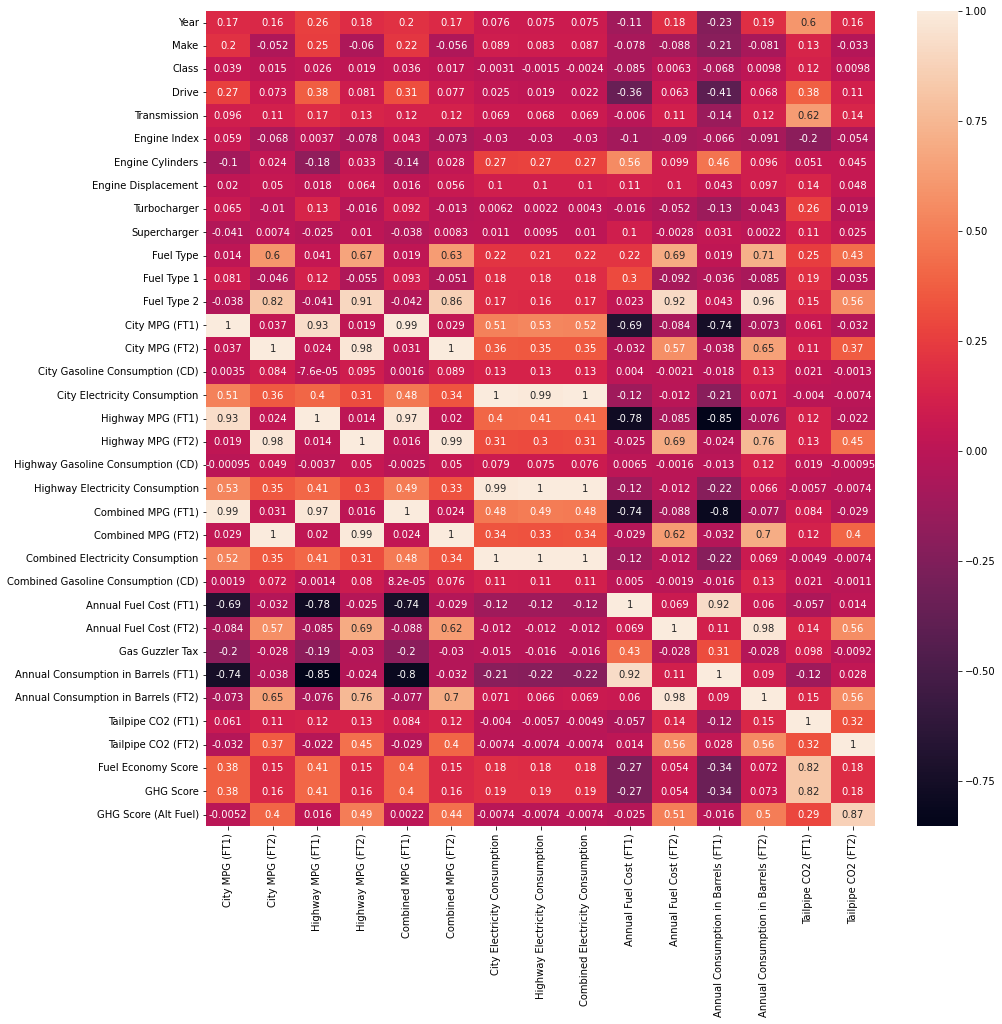

In [1286]:
#Get Correlation for response Variable
df_corr = df_encoded.corr()[resp_features]

fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr,ax=ax,annot=True)
    


In [1296]:
# Get top 5 predictor with the highest correlation for each response variable
for resp in resp_features:
    df_corr_1 = df_corr[[resp]]
    df_corr_1[resp] = np.abs(df_corr_1[resp])
    print (f'{resp}:\n{df_corr_1.sort_values(by=resp,ascending=False).index[:5]}\n')

City MPG (FT1):
Index(['City MPG (FT1)', 'Combined MPG (FT1)', 'Highway MPG (FT1)',
       'Annual Consumption in Barrels (FT1)', 'Annual Fuel Cost (FT1)'],
      dtype='object')

City MPG (FT2):
Index(['City MPG (FT2)', 'Combined MPG (FT2)', 'Highway MPG (FT2)',
       'Fuel Type 2', 'Annual Consumption in Barrels (FT2)'],
      dtype='object')

Highway MPG (FT1):
Index(['Highway MPG (FT1)', 'Combined MPG (FT1)', 'City MPG (FT1)',
       'Annual Consumption in Barrels (FT1)', 'Annual Fuel Cost (FT1)'],
      dtype='object')

Highway MPG (FT2):
Index(['Highway MPG (FT2)', 'Combined MPG (FT2)', 'City MPG (FT2)',
       'Fuel Type 2', 'Annual Consumption in Barrels (FT2)'],
      dtype='object')

Combined MPG (FT1):
Index(['Combined MPG (FT1)', 'City MPG (FT1)', 'Highway MPG (FT1)',
       'Annual Consumption in Barrels (FT1)', 'Annual Fuel Cost (FT1)'],
      dtype='object')

Combined MPG (FT2):
Index(['Combined MPG (FT2)', 'City MPG (FT2)', 'Highway MPG (FT2)',
       'Fuel Type 2', 'A

# 7 Basic Analysis

## 7.1 Top 5 Car Maker with highest MPG 

In [1303]:
df_avg_mpg = df_test_load_csv.groupby(['Make']).agg({'Combined MPG (FT1)' : 'mean'}).reset_index()
df_avg_mpg.rename(columns={'Combined MPG (FT1)' : 'Avg.MPG','Make':'Maker'},inplace=True)
df_avg_mpg.sort_values(by='Avg.MPG',ascending = False, inplace=True)
df_avg_mpg.head()

,Maker,Avg.MPG
118,Tesla,94.452381
20,CODA Automotive,73.000000
12,BYD,65.000000
9,Azure Dynamics,62.000000
129,smart,56.656250


## 7.1 Top 5 Car Maker with Lowest MPG 

In [1304]:
df_avg_mpg.sort_values(by='Avg.MPG',ascending = True, inplace=True)
df_avg_mpg.head()

,Maker,Avg.MPG
122,Vector,8.5
114,Superior Coaches Div E.p. Dutton,10.0
103,S and S Coach Company E.p. Dutton,10.0
17,Bugatti,10.0
60,Laforza Automobile Inc,11.0
